# project 1, face detection, landmark  : 고양이 스티커 앱 만들기

## 1. keypoint detection : landmark, alignment

### 1-1.사진 준비하기

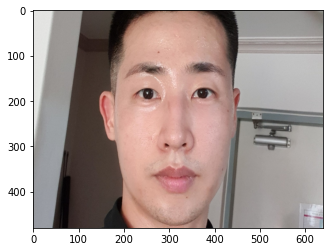

In [177]:
import cv2 # 이미지 처리를 위한 opencv
import matplotlib.pyplot as plt # 이미지 출력을 위한 matplotlib
import numpy as np
import os

my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image3.jpg'
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 읽기
img_bgr = cv2.resize(img_bgr, (640, 480))    # Resize
img_show = img_bgr.copy()      # 출력용 이미지 별도 보관
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) #  # 푸른색은 opencv의 특징 -> RGB 전환
plt.imshow(img_rgb)
plt.show()

### 1-2.  face detection : 얼굴 검출

rectangles[[(118, 76) (504, 461)]]


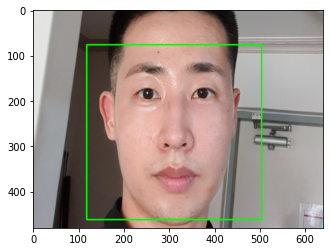

In [178]:
import dlib
detector_hog = dlib.get_frontal_face_detector() # detector 선언(Histogram of Oriented Gradients)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) # dlib는 rgb 이미지를 입력받음
dlib_rects = detector_hog(img_rgb, 1)  # (image, num of img pyramid)

print(dlib_rects)   # 얼굴영역 좌표 출력

# 얼굴 bounding box 출력
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 출력용 이미지 인자값 적용

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

### 1-3. face landmark localization : 얼굴 랜드마크

In [179]:
# landmark 불러오기
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

# landmarks list 내 개별 위치 저장
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0])) # 68개의 튜플(x, y)로 구성된 리스트

68


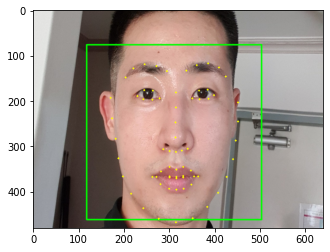

In [180]:
# landmark 출력
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

### 1-4. 스티커 적용하기

In [181]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # nose center index : 30
    x = landmark[30][0] # 인덱스 0, x좌표
    y = landmark[30][1] # 인덱스 1, y좌표
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y)) # 스티커 위치
    print ('(w,h) : (%d,%d)'%(w,h)) # 스티커 크기

(314, 280)
(x,y) : (314,280)
(w,h) : (387,387)


(387, 387, 3)


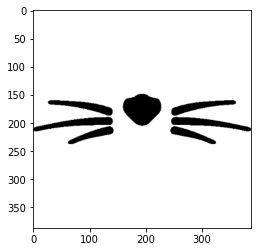

In [182]:
# 스티커 이미지 읽고 전 단계 계산된 크기로 resize
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

plt.imshow(img_sticker)
plt.show()

In [185]:
refined_x = x - w // 2  # left
refined_y = y - h // 2 # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (121,87)


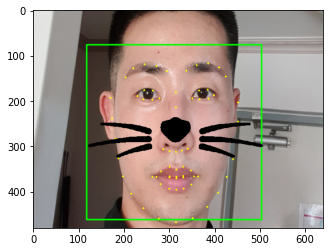

In [186]:
# 원본 이미지에 스티커 적용
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)

# 결과 이미지 출력, 다른 조건 하에 여러번 출력하면 스티커가 여러개 찍힘
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

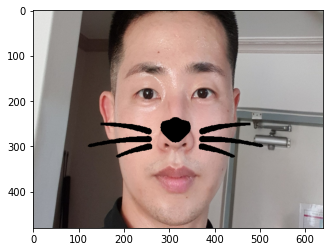

In [187]:
# bounding box와 landmark를 제거하고 최종 결과만 출력
# sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
#    np.where(img_sticker==0,img_sticker, sticker_area).astype(np.uint8)

sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker, sticker_area).astype(np.uint8)

# 결과 이미지 출력
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))  # img_show 대신 사전에 준비한 img_bgr 사용(새로운 스티커를 찍기 위해)
plt.show()

# project summary
- 오류 발생
   - 원본에 스티커 적용 코드에서 'operands could not be broadcast together with shapes' 오류가 발생했는데 구글링 결과 다른 차원의 배열간 브로드캐스팅이 적용되지 않아 발생한 것으로 확인됐다. 이후 y값을 수정한 이후에 출력이 됐고 시험삼아 x, y의 값을 변경해줬는데 특정 구간에서는 되지만 구간을 벗어난 경우에는 적용되지 않는 것으로 보아 해당 코드는 두가지 조건(스티커 사진의 크기, 일정 범위 내)이 충족되어야 한다. 
   - 수염이 반전(흰색배경, 투명 그림)돼서 나왔는데 np.where() 함수 내 인자값이 첫번째는 조건식, 두번째는 조건식이 참일 경우, 세번째는 조건식이 거짓일 경우에 따라, img_sticker==0(색이 없는 것=검정색?) 일때, img_sticker(검정색)을, 아닐 때 sticker_area(흰샌 배경)이 적용된 것 같다.
   - 마지막 Img_bgr을 사용한 것은 사진에 스티커가 붙히면 그대로 저장(?)되기에 새롭게 쓰는 것으로 판단했다.


- 문제점 찾아보기 -> 지속적으로 확인!!
    - 얼굴 각도에 따른 스티커의 변화
    - 거리에 따른 사진별 스티커 적용가능여부
    - 실행속도의 중요성
    - 정확도의 중요성